In [84]:
import os
import torch
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2", node_size=2)
    plt.show()


def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    #plt.xticks([])
    #plt.yticks([])
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=20, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

In [54]:
from torch_geometric.datasets import KarateClub
import data_utils
import importlib
importlib.reload(data_utils)

#dataset = KarateClub()
dataset, data = data_utils.get_cora(10)

In [56]:
data.x[data.train_mask]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

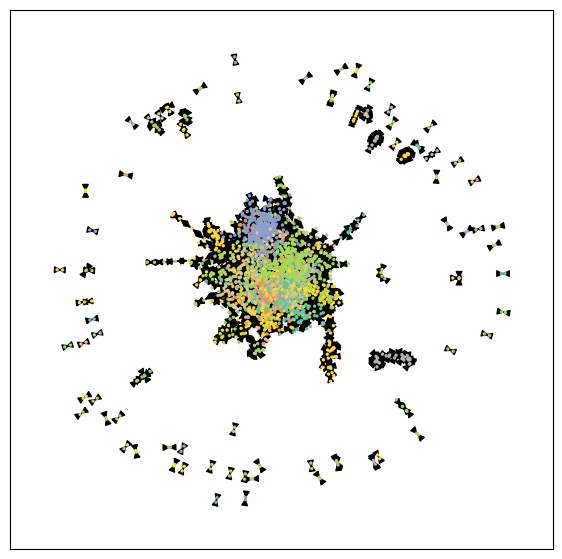

In [61]:
from torch_geometric.utils import to_networkx
#data = dataset[0]
G = to_networkx(data, to_undirected=False, remove_self_loops=True)

visualize_graph(G, color=data.y)

In [5]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import importlib
import model
importlib.reload(model)
GCN = model.GCN
GVAE = model.GVAE

model = model.GCN(dataset.num_features, dataset.num_classes)
print(model)

GCN(
  (conv1): GCNConv(34, 80)
  (conv2): GCNConv(80, 80)
  (conv3): GCNConv(80, 4)
)


Embedding shape: [2708, 7]


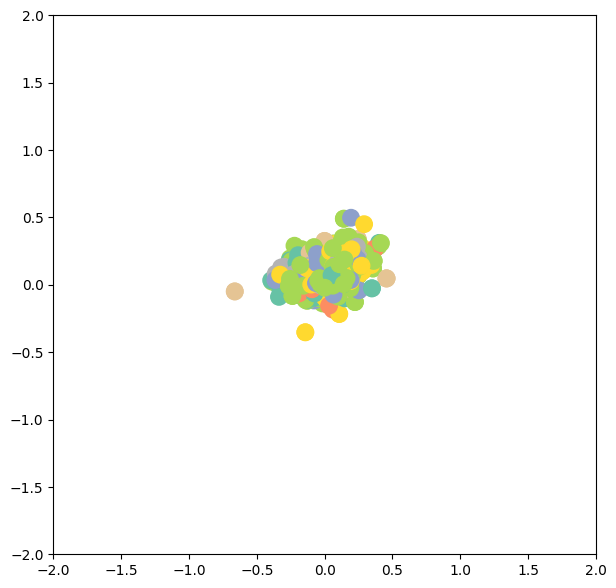

In [39]:
model = GCN(dataset.num_features, dataset.num_classes)

h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.y)

<IPython.core.display.Javascript object>

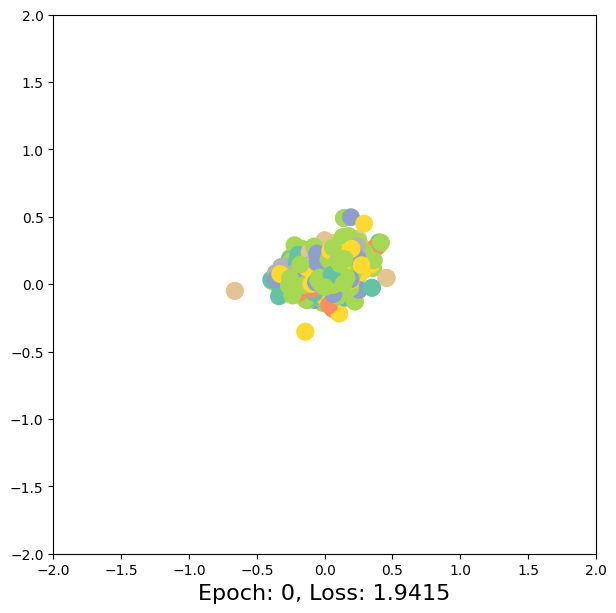

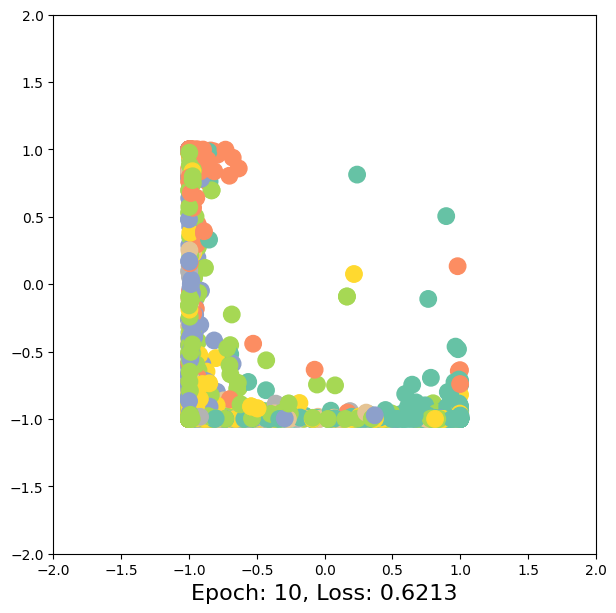

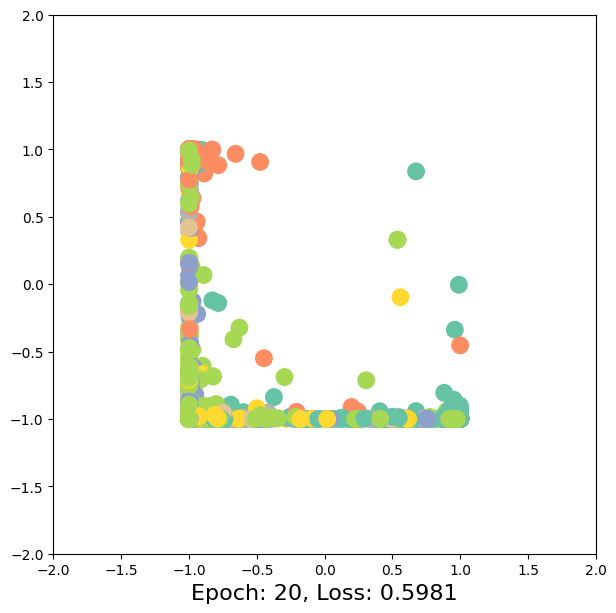

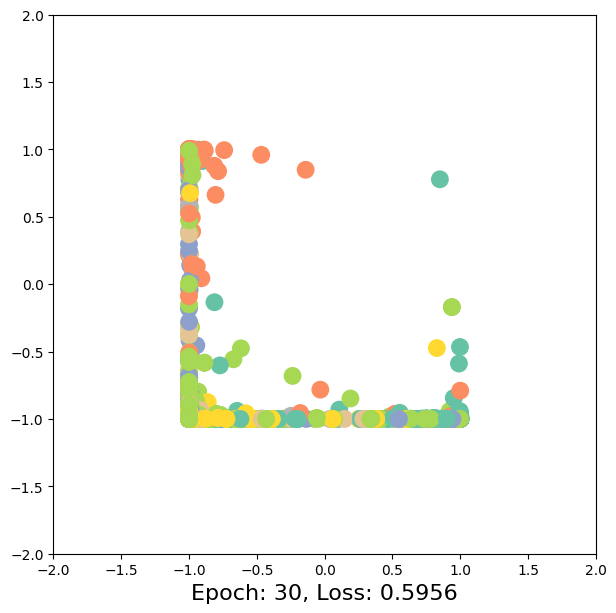

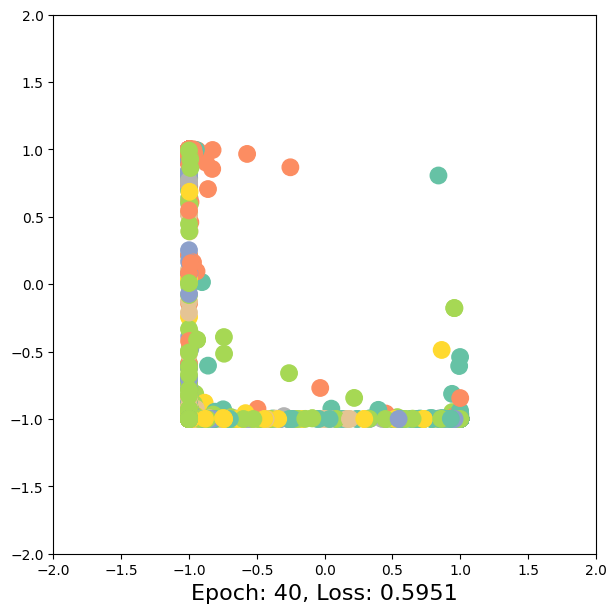

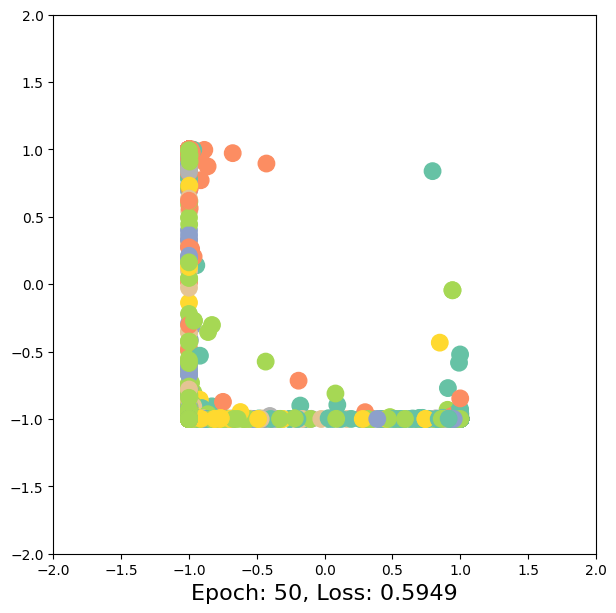

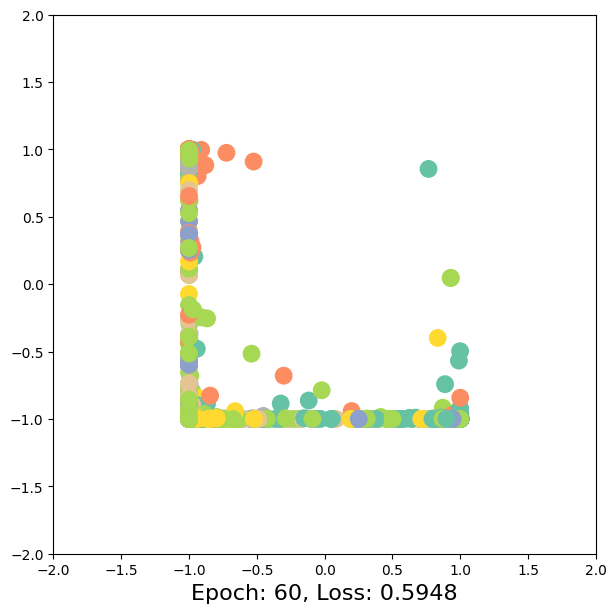

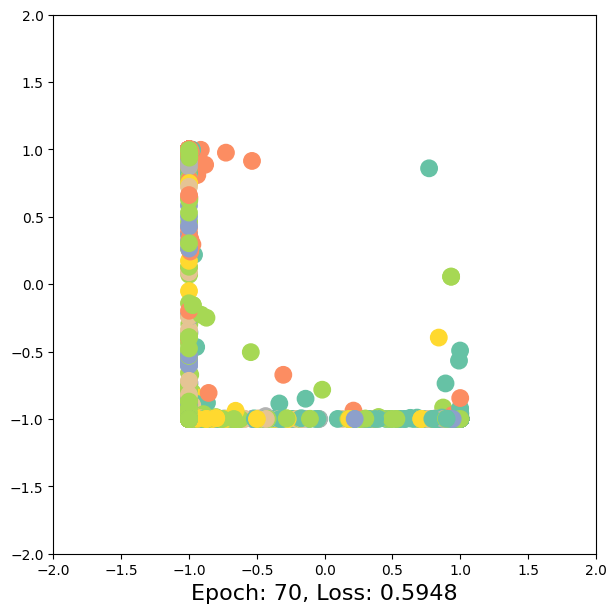

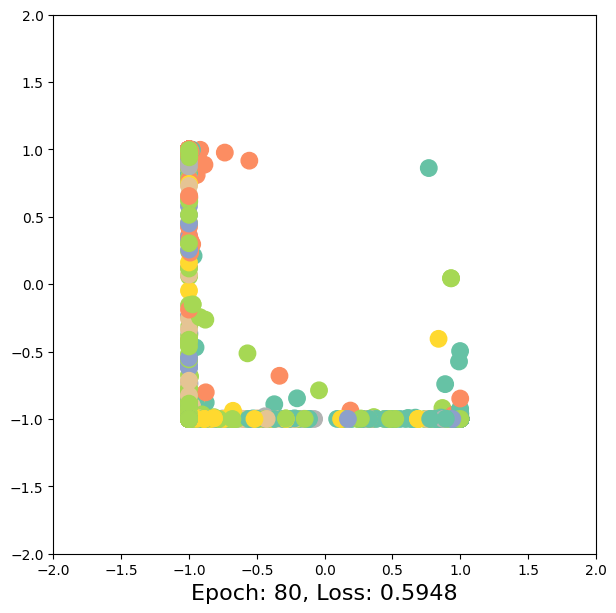

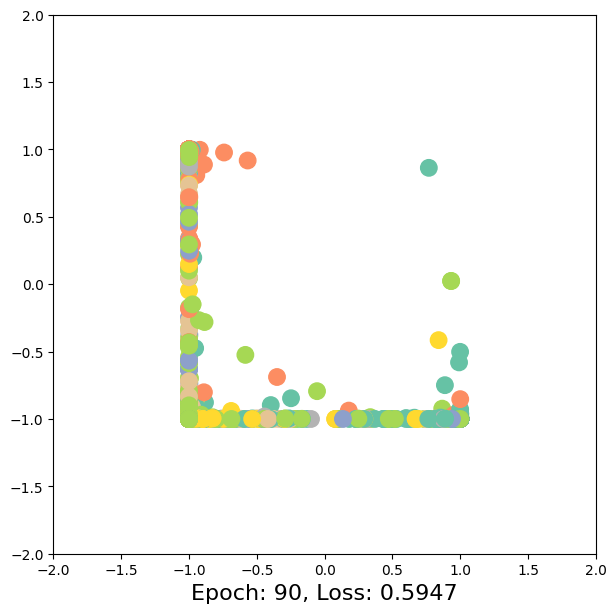

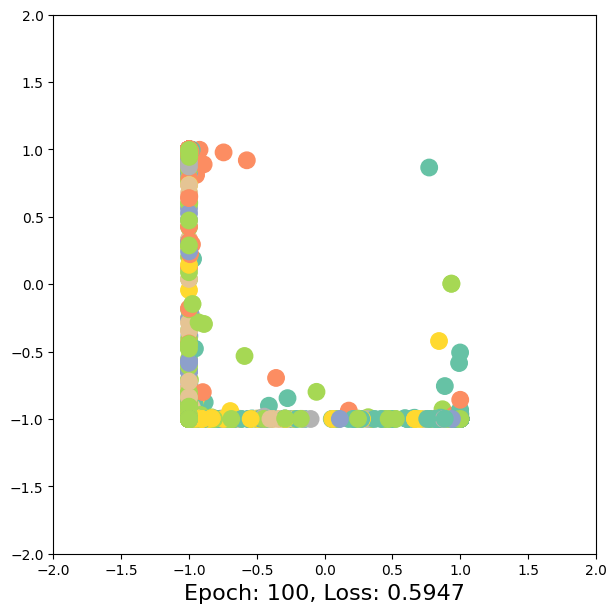

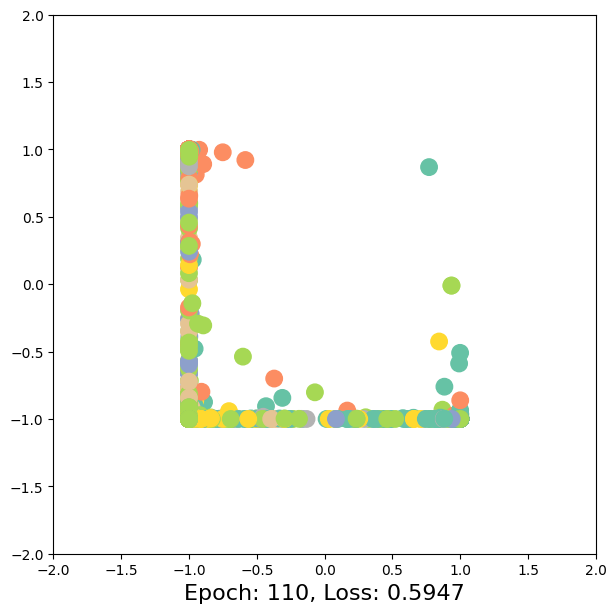

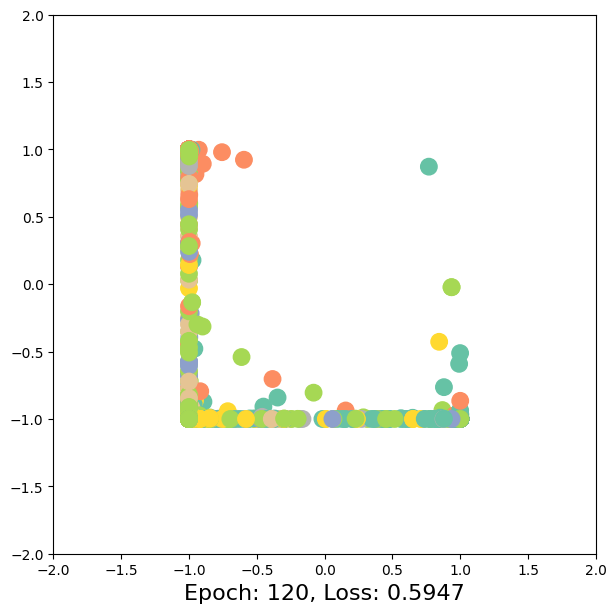

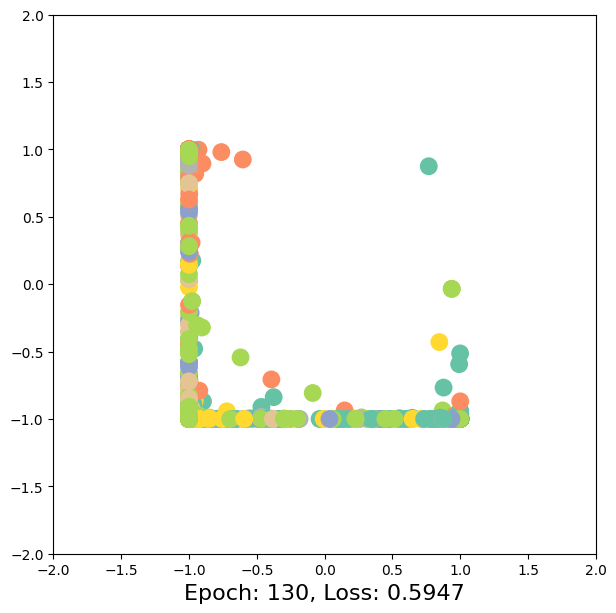

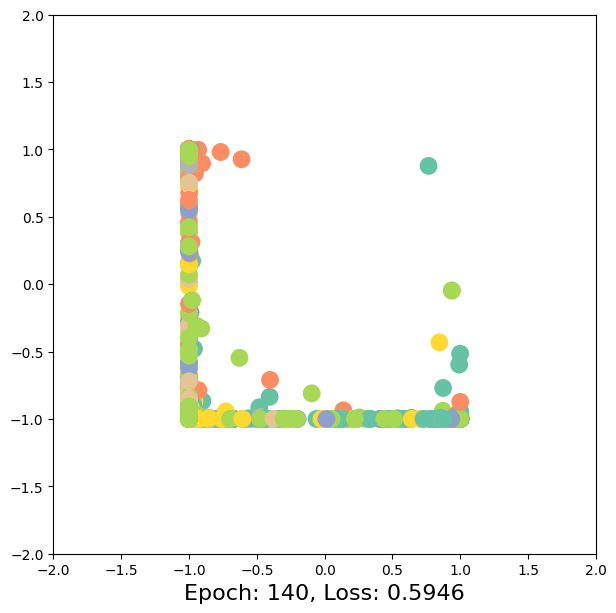

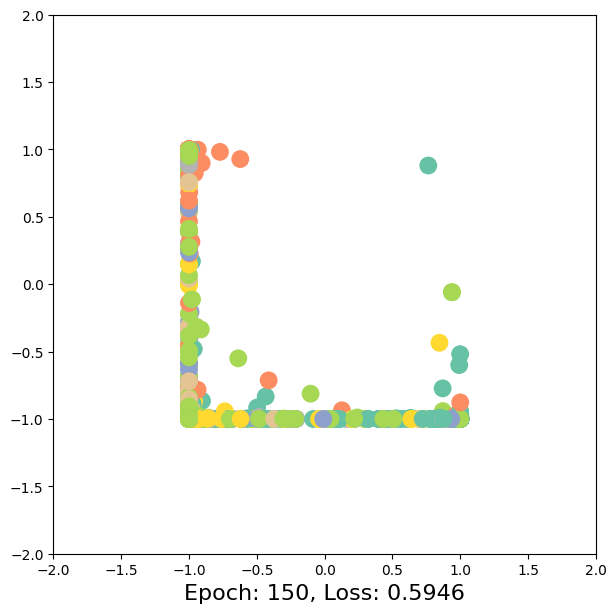

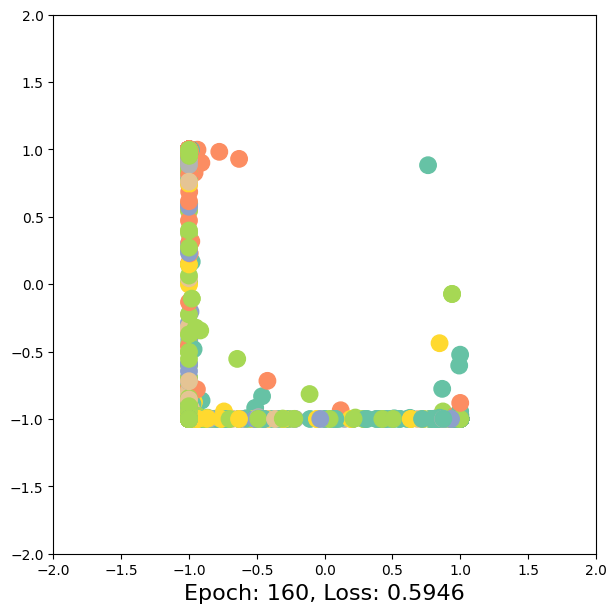

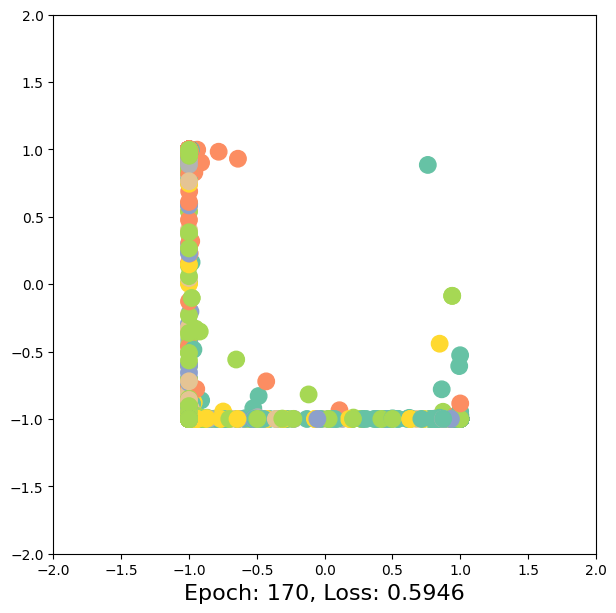

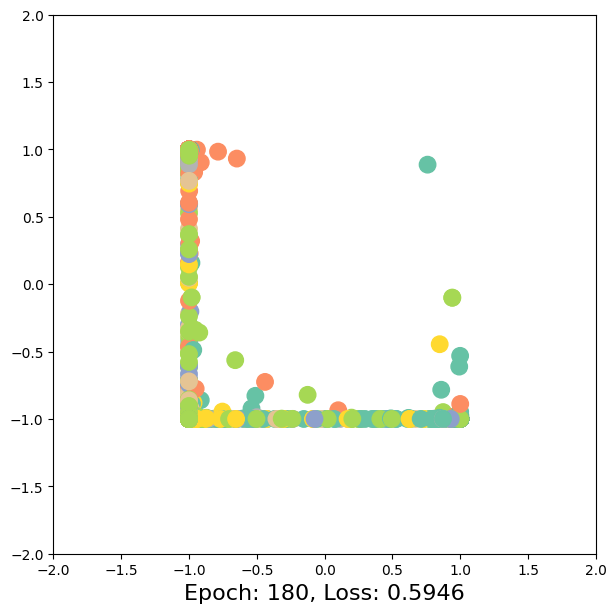

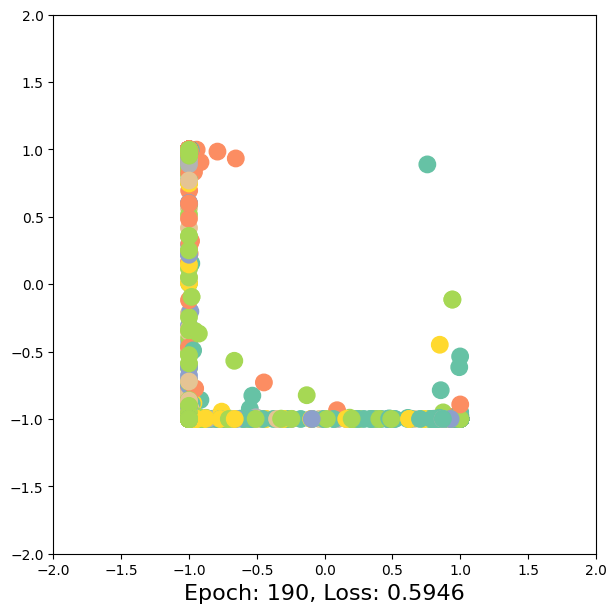

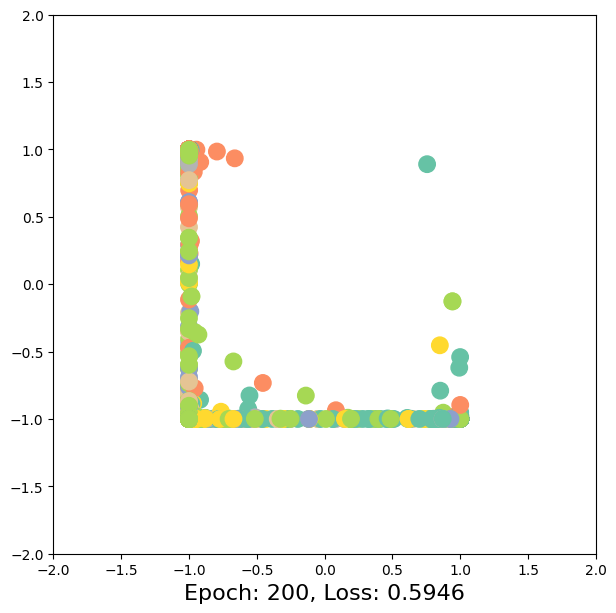

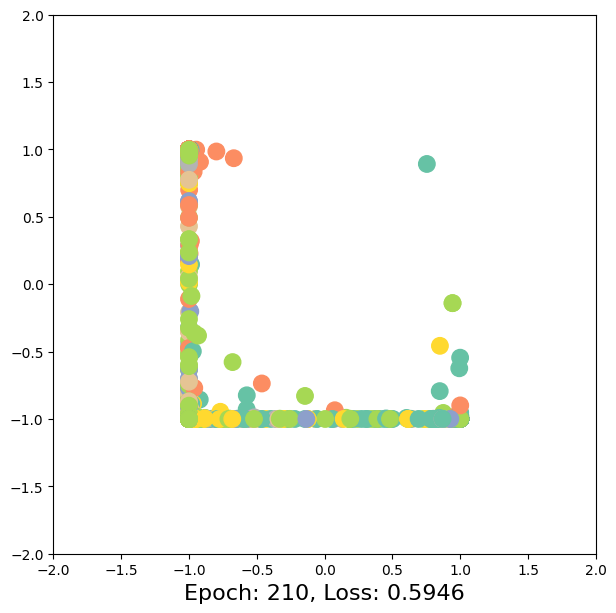

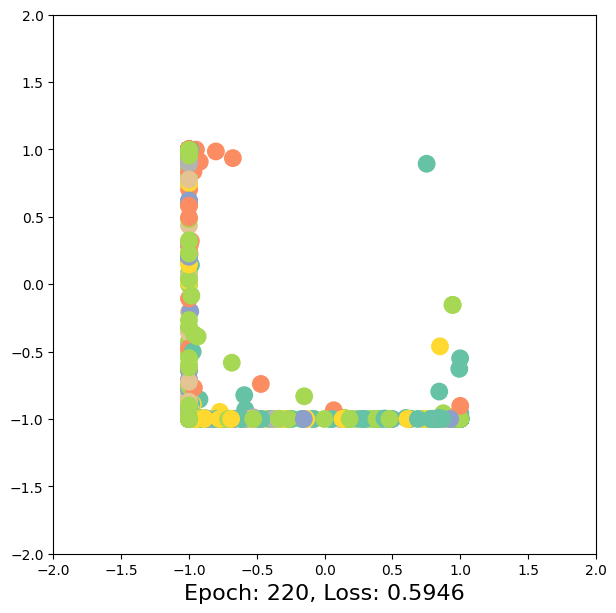

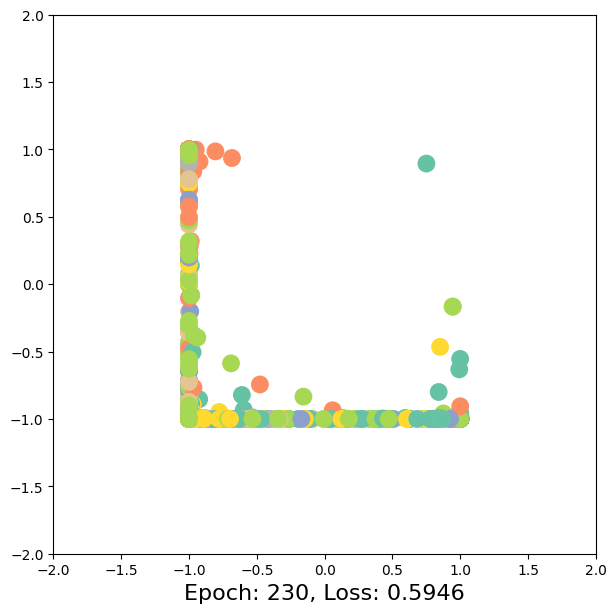

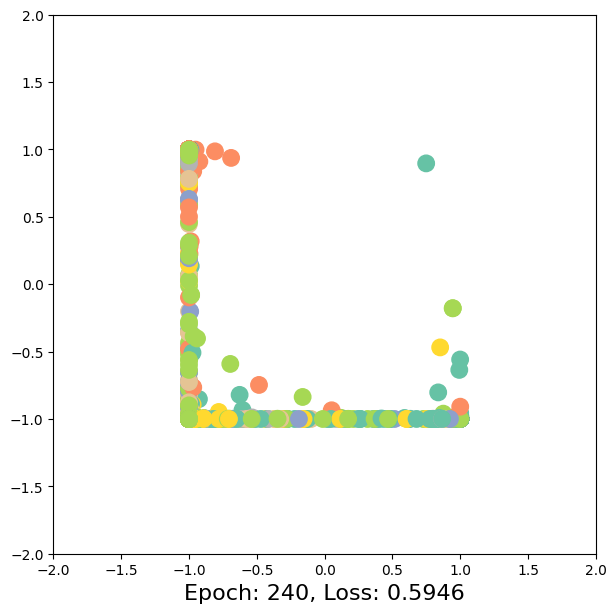

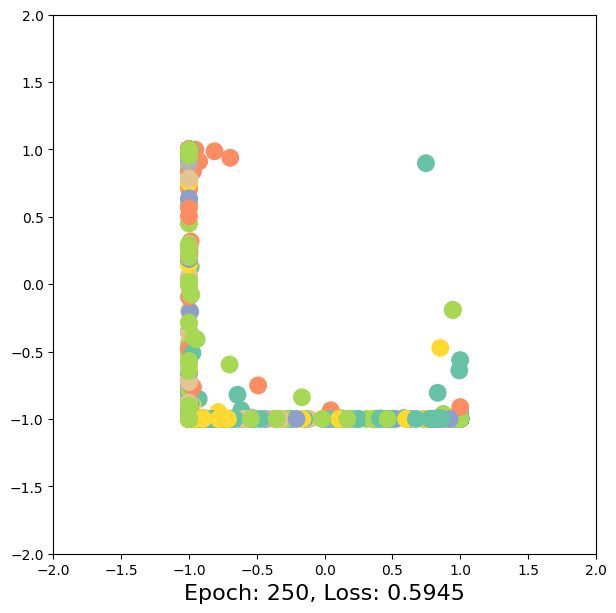

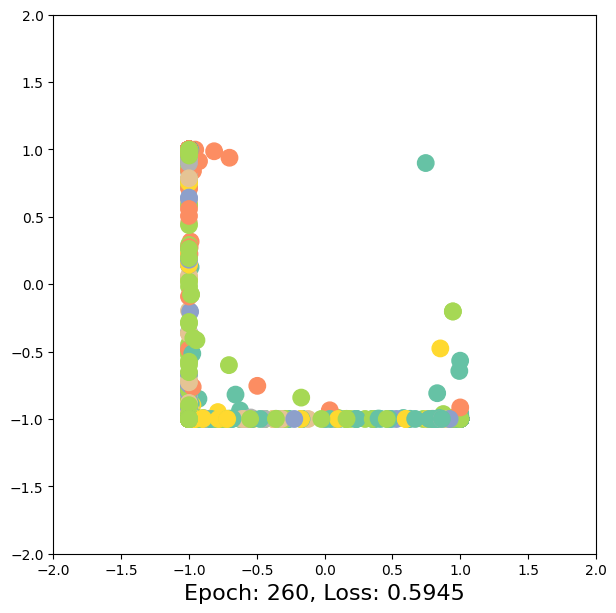

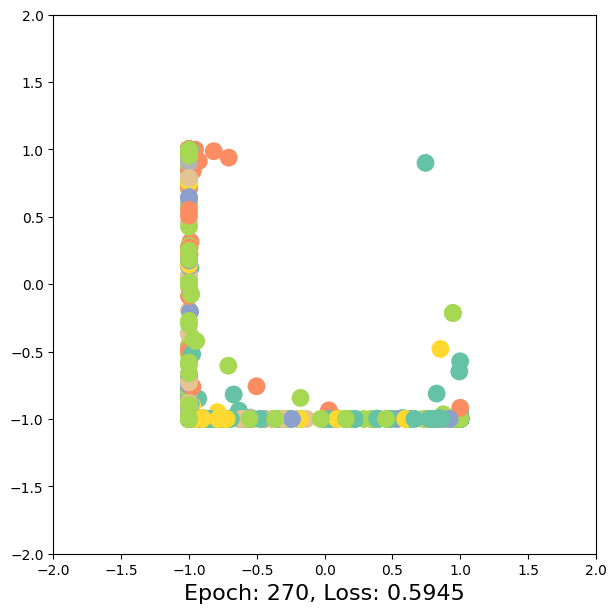

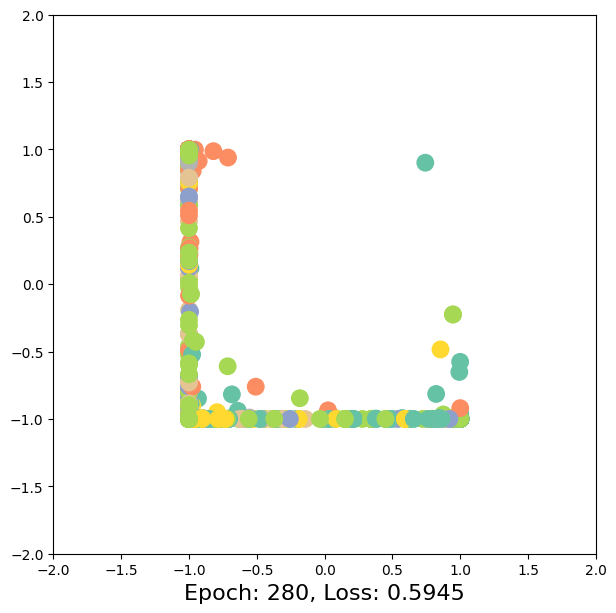

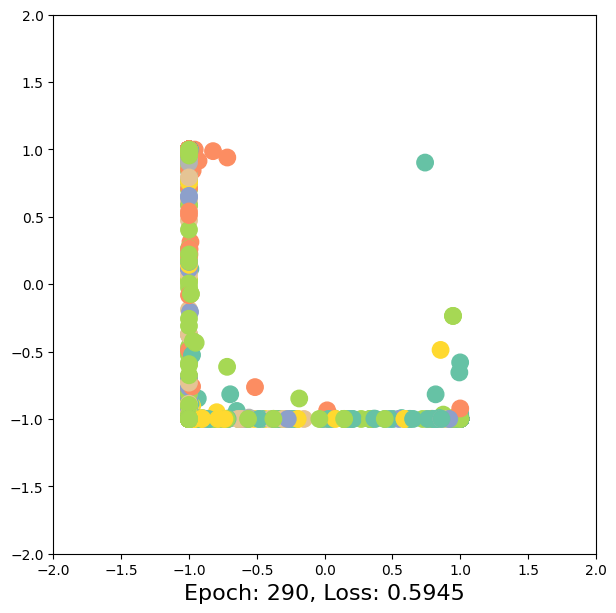

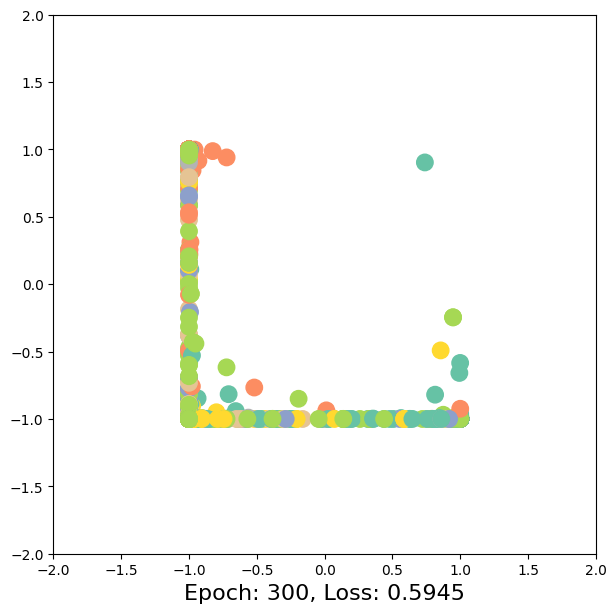

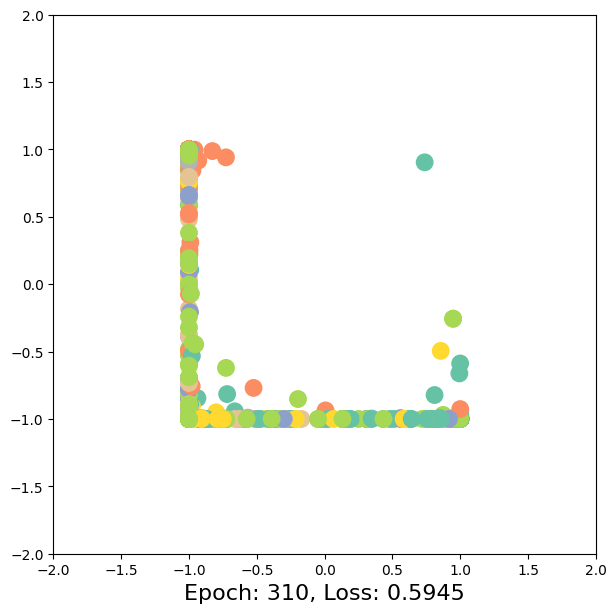

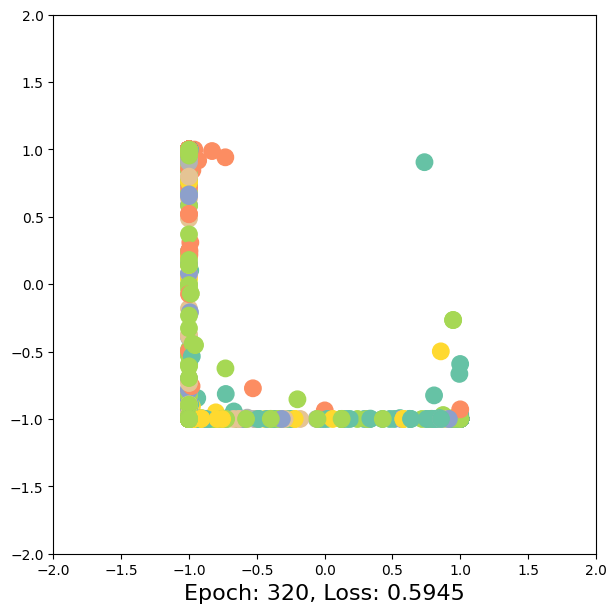

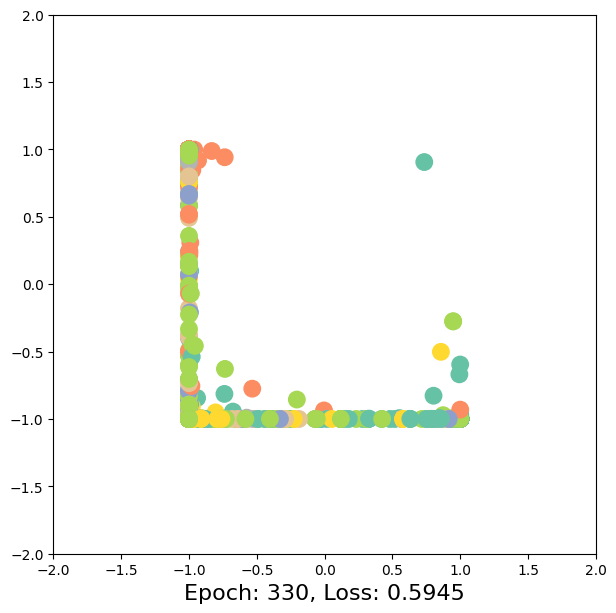

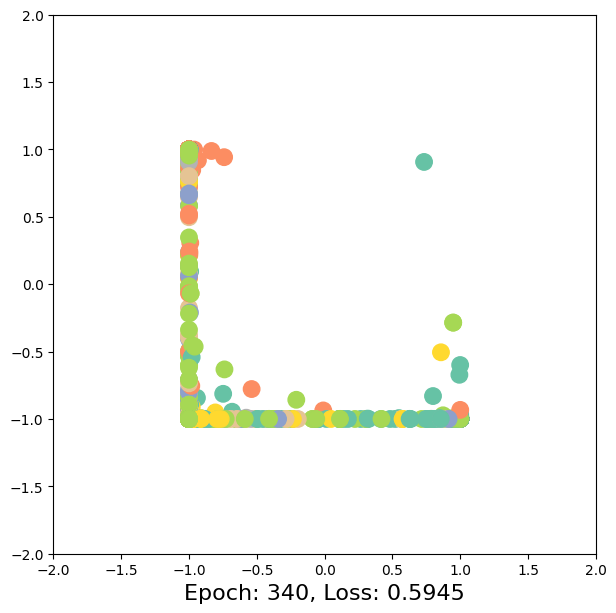

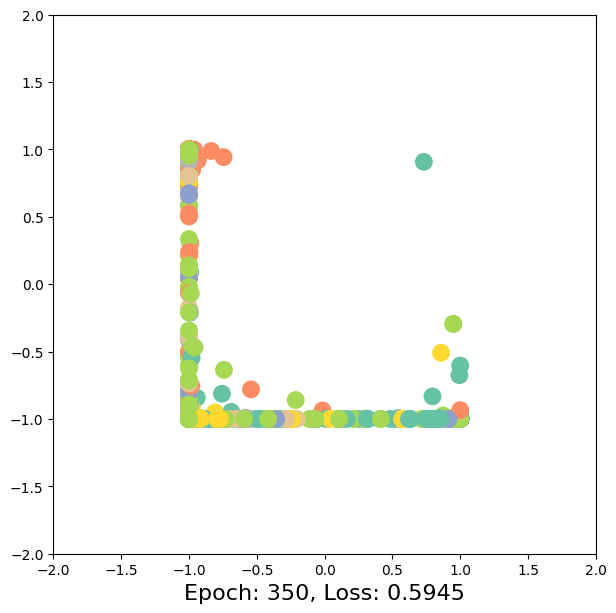

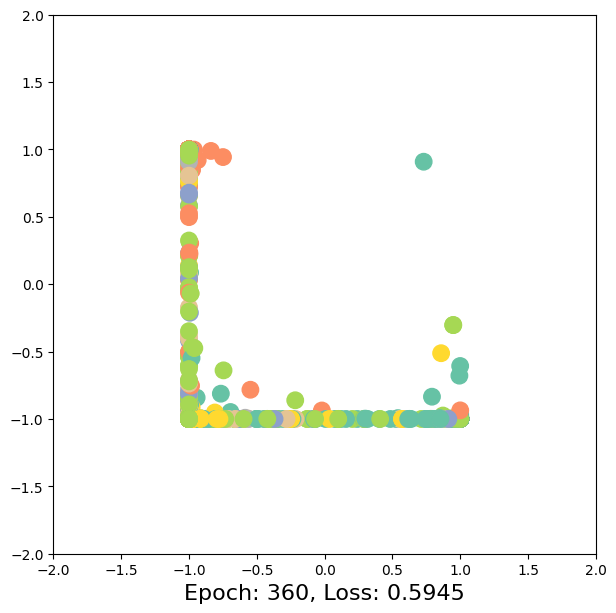

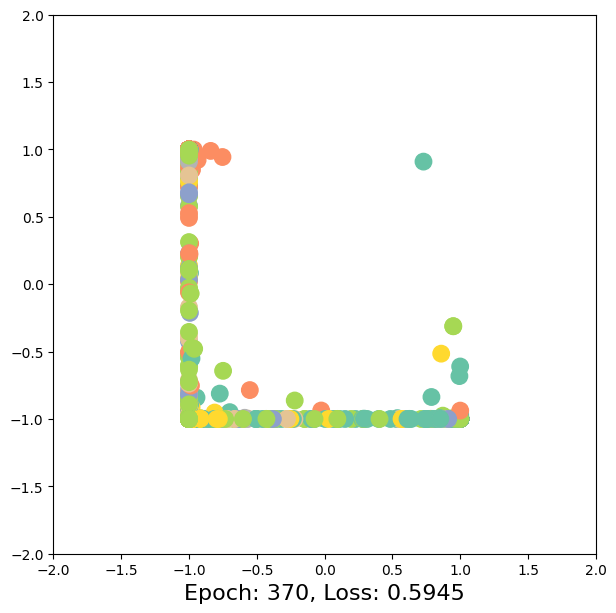

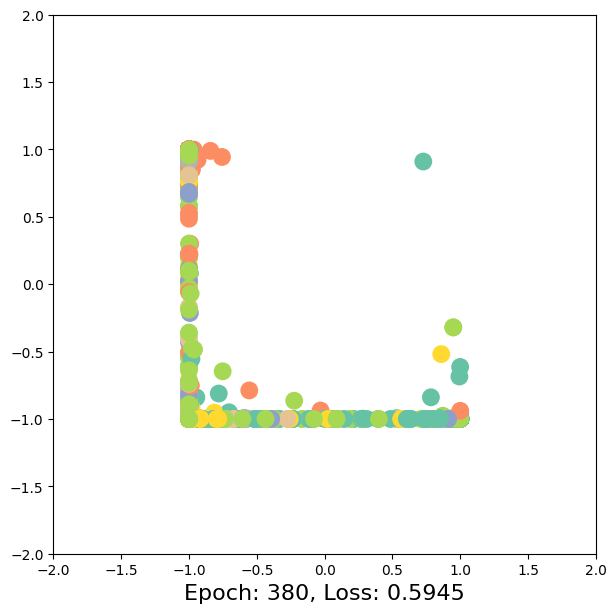

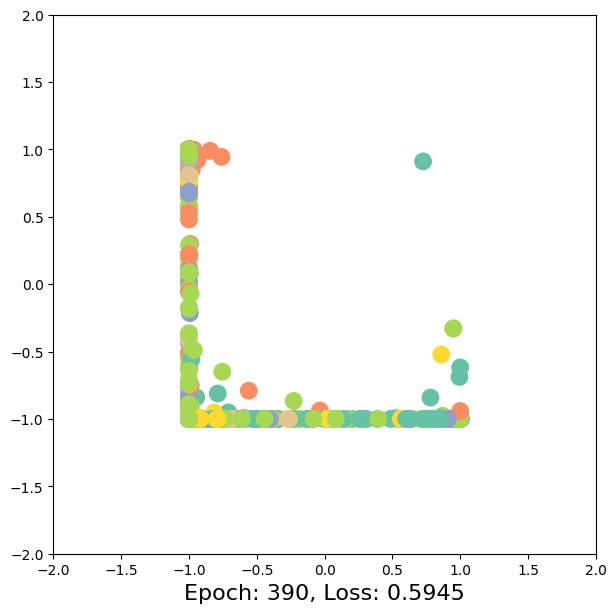

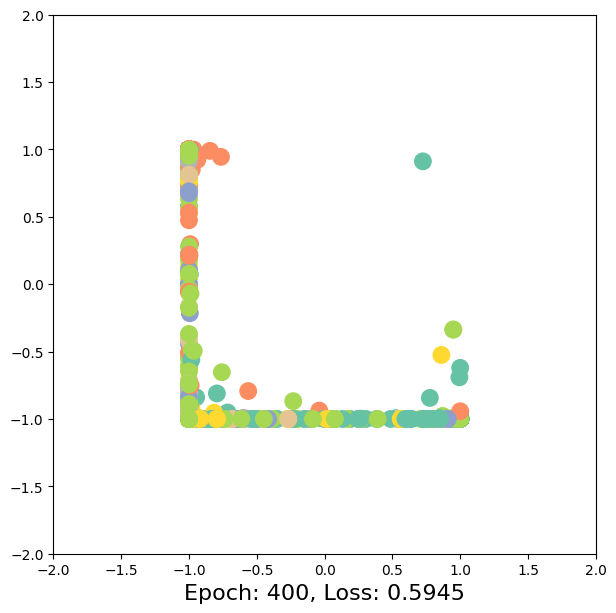

In [43]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN(dataset.num_features, dataset.num_classes)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(h[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

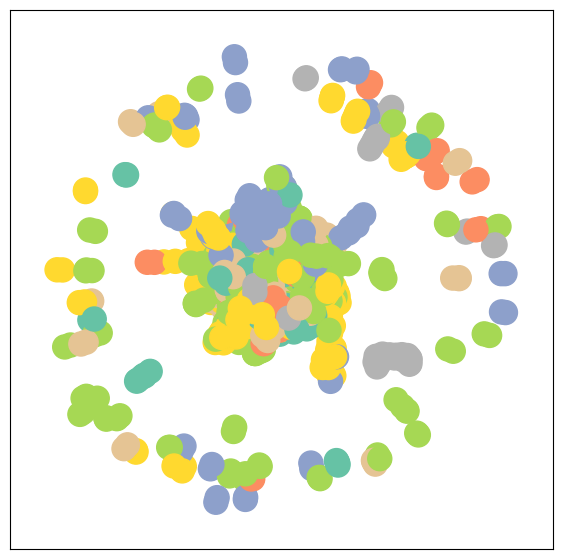

In [45]:
with torch.no_grad():
    #pred = torch.clamp(model(data.x, data.edge_index)[-1].detach(), min=torch.tensor(0), max=torch.tensor(4)).to(torch.int32)
    out = model(data.x, data.edge_index)
    pred = torch.argmax(out, dim=1)
    visualize_graph(G, color=pred)

In [ ]:
with torch.no_grad():
    pred = torch.argmax(model(data.x, data.edge_index)[-1], dim=1)

In [ ]:
model(data.x, data.edge_index)[-1].detach()

tensor([[ 0.0962,  0.0115],
        [ 0.0235,  0.0129],
        [ 0.0432,  0.0201],
        [ 0.0401,  0.0162],
        [ 0.0522, -0.0054],
        [ 0.0775,  0.0011],
        [ 0.0763,  0.0031],
        [ 0.0300,  0.0131],
        [ 0.0107,  0.0181],
        [ 0.0014,  0.0195],
        [ 0.0575, -0.0035],
        [ 0.0867,  0.0090],
        [ 0.0353,  0.0106],
        [ 0.0242,  0.0179],
        [-0.0114,  0.0138],
        [-0.0109,  0.0173],
        [ 0.0740,  0.0046],
        [ 0.0188,  0.0012],
        [-0.0139,  0.0210],
        [ 0.0068,  0.0108],
        [ 0.0077,  0.0168],
        [ 0.0014,  0.0033],
        [-0.0065,  0.0175],
        [ 0.0657,  0.0242],
        [ 0.1390,  0.0069],
        [ 0.1296,  0.0110],
        [-0.0140,  0.0309],
        [ 0.0852,  0.0189],
        [ 0.0415,  0.0141],
        [ 0.0032,  0.0333],
        [-0.0036,  0.0152],
        [ 0.0995,  0.0135],
        [ 0.0102,  0.0337],
        [ 0.0181,  0.0381]])

In [ ]:
model(data.x, data.edge_index)[1].detach()

tensor([[-0.9934, -0.9872],
        [-0.9999, -0.3140],
        [-0.9994,  0.9654],
        [-0.9988, -0.4219],
        [ 0.9873, -0.9900],
        [ 0.9968, -0.9972],
        [ 0.9968, -0.9972],
        [-0.9932, -0.0332],
        [-0.9872,  0.9821],
        [-0.9615,  0.9853],
        [ 0.9875, -0.9900],
        [-0.7699, -0.7664],
        [-0.9659, -0.6461],
        [-0.9932,  0.5391],
        [-0.9346,  0.9944],
        [-0.9332,  0.9944],
        [ 0.9983, -0.9938],
        [-0.9680, -0.5459],
        [-0.9310,  0.9950],
        [-0.9722,  0.4383],
        [-0.9238,  0.9945],
        [-0.9732, -0.5114],
        [-0.9316,  0.9944],
        [-0.0536,  0.9987],
        [ 0.9934,  0.9882],
        [ 0.9888,  0.9905],
        [-0.9477,  0.9978],
        [ 0.3735,  0.9940],
        [-0.7375,  0.9893],
        [-0.9560,  0.9992],
        [-0.9887,  0.9818],
        [ 0.6570,  0.9918],
        [-0.9997,  1.0000],
        [-1.0000,  1.0000]])

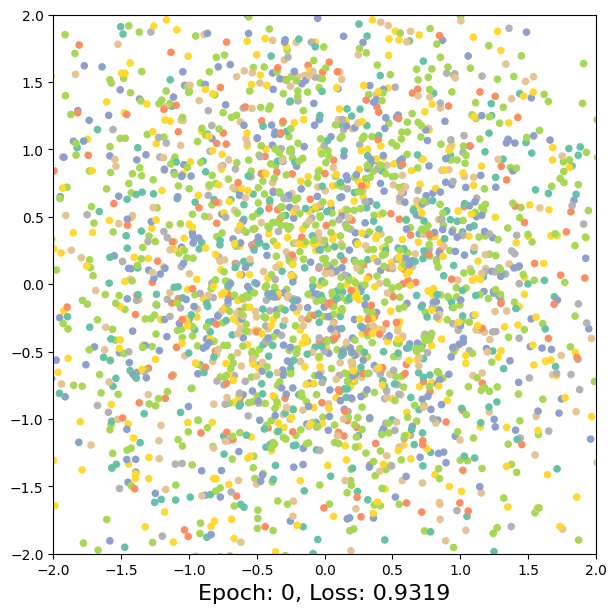

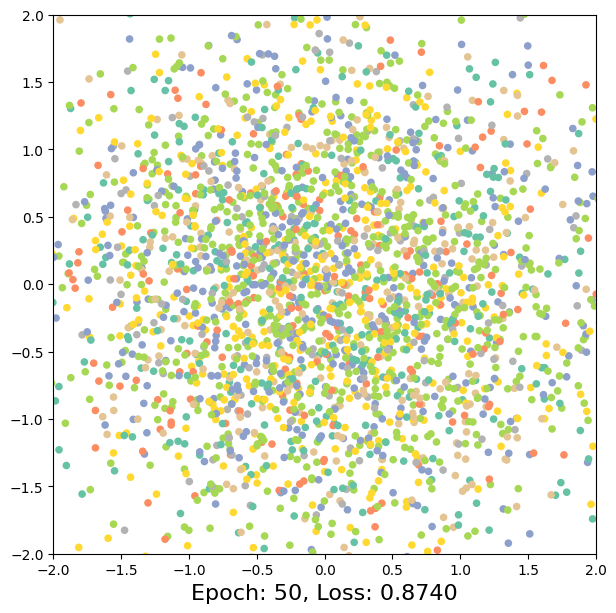

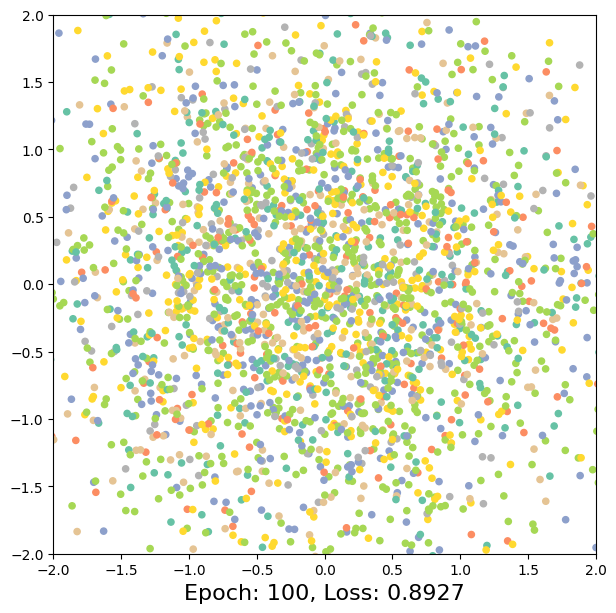

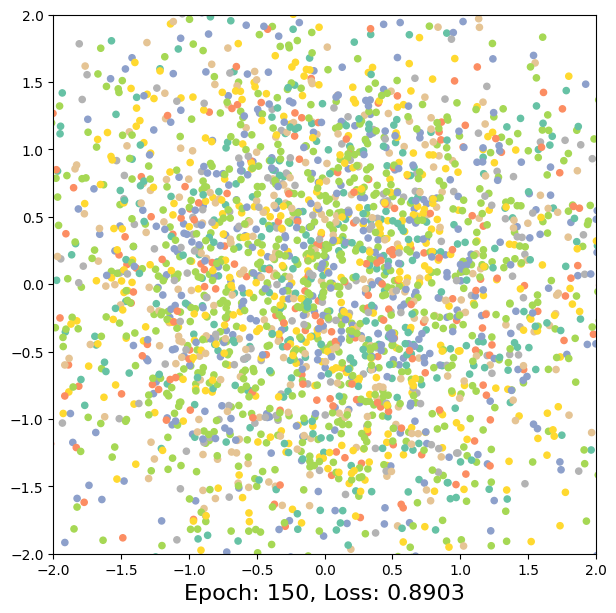

In [109]:
from torch_geometric import EdgeIndex
from torch_geometric.utils import to_dense_adj
import model
import time
importlib.reload(model)
GCN = model.GCN
GVAE = model.GVAE
EdgeGenerativeDecoder = model.InnerProductDecoder

embedding_dim = 2 
encoder = GCN(data.num_features, 2*embedding_dim) # 4 = 2 means + 2 logvars = embedding_dim * 2
#decoder = GCN(embedding_dim, dataset.num_classes) # CLASSIC VAE
decoder = model.InnerProductDecoder()

vae = GVAE(encoder=encoder, decoder=decoder, embedding_dim=embedding_dim) 
optimizer = torch.optim.Adam(vae.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.

    # FORWARD
    A_recon, mu, log_std, z_sampled = vae(data.x, data.edge_index) 
    # LOSS
    #reconstruction_loss = torch.nn.functional.cross_entropy(x_recon[data.train_mask], data.y[data.train_mask], reduction='mean')
    reconstruction_loss = torch.nn.functional.binary_cross_entropy(A_recon, to_dense_adj(data.edge_index).reshape(-1), reduce='sum')
    KLD = (0.5 / data.num_nodes) * torch.mean(torch.sum(1 + 2*log_std - mu.pow(2) - log_std.exp().pow(2), dim=1))
    loss = reconstruction_loss - KLD


    # OPTIMIZATION STEP
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.


    return loss, A_recon, z_sampled, KLD, reconstruction_loss

losses = []

for epoch in range(200):
    loss, A_recon, z_sampled, kld, entropy = train(data)
    with torch.no_grad():
        accuracy = torch.mean(torch.eq((torch.sign(A_recon - 0.5) + 1)//2, to_dense_adj(data.edge_index).reshape(-1)).to(torch.float))
        losses += [torch.tensor([loss, kld, entropy, accuracy])]
        if epoch % 50 == 0 and embedding_dim == 2:
            visualize_embedding(z_sampled, color=data.y, epoch=epoch, loss=loss)
            time.sleep(0.3)

[tensor([ 9.3186e-01, -4.7144e-06,  9.3186e-01,  4.9971e-01]), tensor([ 8.8093e-01, -1.7198e-07,  8.8093e-01,  4.9992e-01]), tensor([ 8.9648e-01, -1.6722e-08,  8.9648e-01,  4.9964e-01]), tensor([ 8.8739e-01, -4.3124e-09,  8.8739e-01,  4.9999e-01]), tensor([ 8.7863e-01, -1.1734e-09,  8.7863e-01,  4.9969e-01]), tensor([ 8.8730e-01, -1.0913e-09,  8.8730e-01,  5.0009e-01]), tensor([ 8.9835e-01, -1.6989e-09,  8.9835e-01,  4.9987e-01]), tensor([ 8.9202e-01, -2.6289e-09,  8.9202e-01,  4.9951e-01]), tensor([ 8.8749e-01, -4.1511e-09,  8.8749e-01,  4.9957e-01]), tensor([ 8.8527e-01, -7.6048e-09,  8.8527e-01,  4.9906e-01]), tensor([ 8.9016e-01, -1.4624e-08,  8.9016e-01,  4.9987e-01]), tensor([ 8.7894e-01, -2.1323e-08,  8.7894e-01,  4.9999e-01]), tensor([ 9.0006e-01, -2.4649e-08,  9.0006e-01,  4.9952e-01]), tensor([ 8.9359e-01, -2.6970e-08,  8.9359e-01,  4.9939e-01]), tensor([ 8.8162e-01, -2.9895e-08,  8.8162e-01,  4.9994e-01]), tensor([ 8.9551e-01, -2.9735e-08,  8.9551e-01,  5.0002e-01]), tensor(

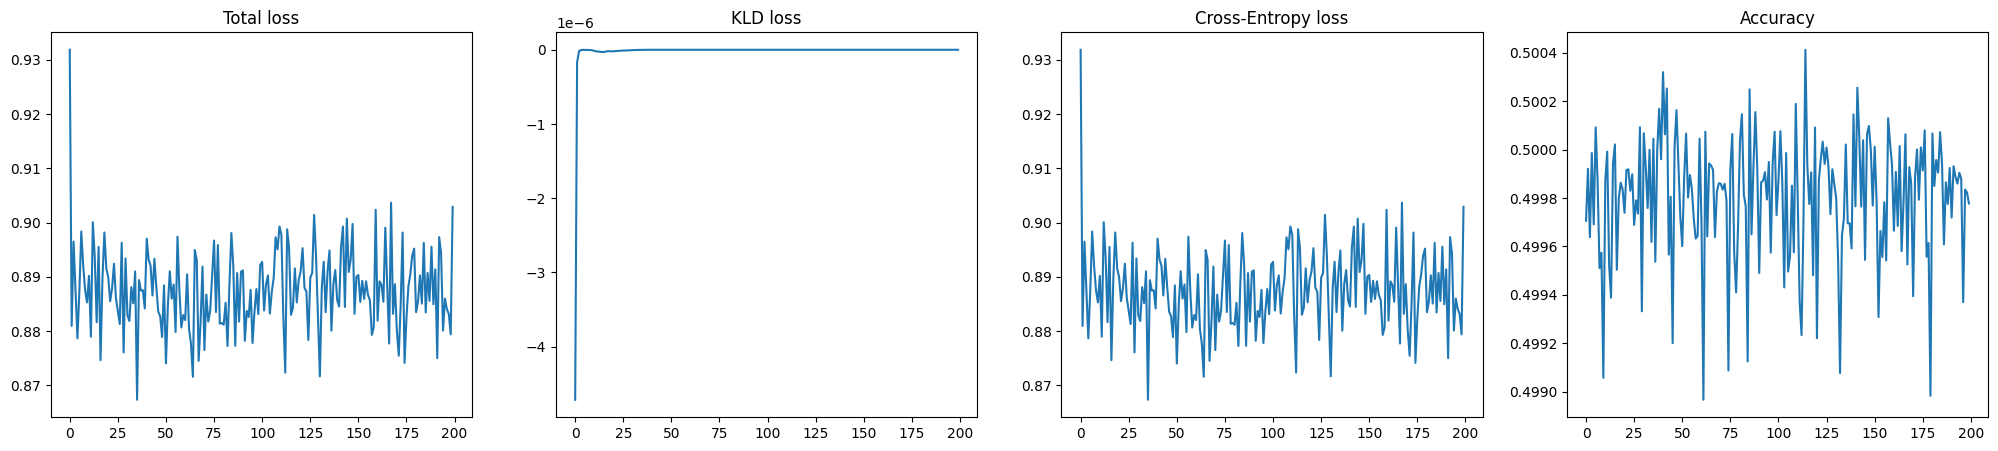

In [111]:
print(losses)
fig, axs = plt.subplots(1,4, figsize=(25,5))
for i in range(4):
    axs[i].plot([l[i] for l in losses])
    axs[i].set_title(['Total loss', 'KLD loss', 'Cross-Entropy loss', 'Accuracy'][i])
    #axs[i].set_xscale('log')
plt.show()

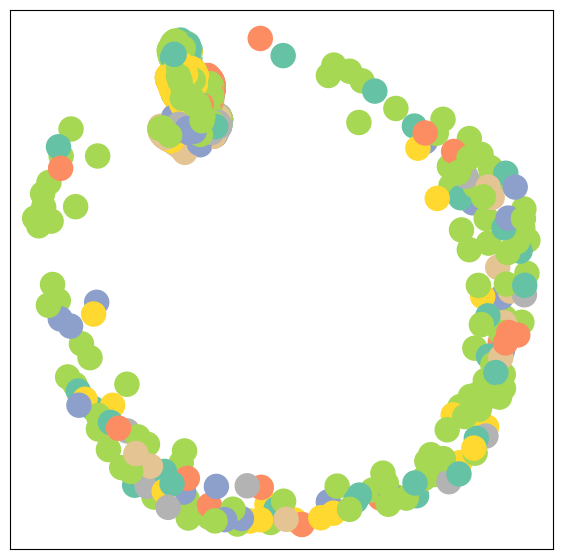

In [50]:
from torch_geometric.utils import dense_to_sparse
from torch_geometric.data import Data
A_recon = vae(data.x, data.edge_index)[0]
A_recon = (torch.sign(A_recon - 0.5) + 1)//2
edge_index_recon, _ = dense_to_sparse(A_recon)
visualize_graph(to_networkx(Data(data.x, edge_index=edge_index_recon), remove_self_loops=True), color=data.y)

In [207]:
vae(data.x, data.edge_index)[0].shape

torch.Size([34, 34])

In [49]:
visualize_graph(to_networkx(Data(data.x, edge_index=edge_index_recon), remove_self_loops=True), color=data.y)

NameError: name 'Data' is not defined

In [101]:
to_dense_adj(data.edge_index).reshape(-1).shape

torch.Size([7333264])

In [108]:
to_dense_adj(data.edge_index).reshape(-1).to(torch.float)

tensor([0., 0., 0.,  ..., 0., 1., 0.])